## Marks vs Hours

This project is used to predict marks based on the hours of sleep.

In [41]:
#Importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Importing the datasets

The dataset was custom built to act as a beginner level project.

In [2]:
#importing the dataset as pandas dataframe

student_df = pd.read_csv('marks_v_hrs.csv')

student_df.head() #displaying the first five rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2: Data Analysis

Lets learn about the patterns and alter the datasets.

Lets begin by getting the basic information and comprehensive summary of the dataset.

In [3]:
#basic information about dataset

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hence, it is quite evident that the dataset has 25 samples, 1 attribute namely Hours and 1 target namely Scores. Both features have numerical attributes hence doesn't require alteration.

In [5]:
#basic statistical summary of the dataset

student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


As we can see, the count for both the attribute and target are 25, hence no missing values are present.

Still lets check it.

In [10]:
miss_val = student_df['Hours'].isnull().sum() #getting the missing values for Hours features
miss_val

0

Lets now separate our feature and target and also visualize the distribution.

In [32]:
feature = student_df['Hours'].to_numpy().reshape(-1 , 1) #setting the feature variable
target = student_df['Scores'].to_numpy().reshape(-1 , 1) #setting the target variable

Lets visualize feature through different plots namely,
1. Histogram
2. Boxplot

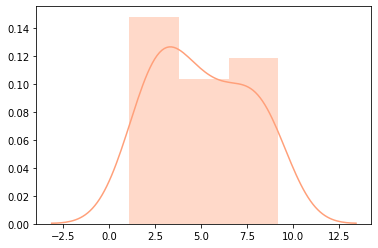

In [28]:
#plotting histogram
sns.distplot(feature , color = 'lightsalmon')
plt.show()

The histogram is more or less bell shaped and doesn't require any sort of transformation.

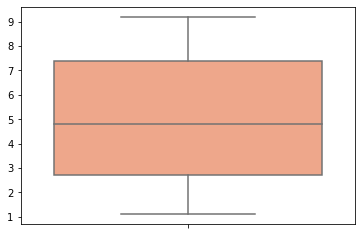

In [29]:
#plotting barplot
sns.boxplot(feature , orient = "v" , color = 'lightsalmon')
plt.show()

The features doesn't have any outliers and is quite balanced as indicated by the histogram.

## Step 3: Modelling

Lets set up the basic linear regression stage thereafter we are going to improvise to get better result. We will visualize the steps for better understanding.

In [34]:
#setting up the linear regression model and fitting the data

lr = LinearRegression()
reg = lr.fit(feature , target)

print('Coefficient of regression is :' , reg.coef_ , '\nIntercept is :' , reg.intercept_)

Coefficient of regression is : [[9.77580339]] 
Intercept is : [2.48367341]


Lets visualize the predicted line and the data.

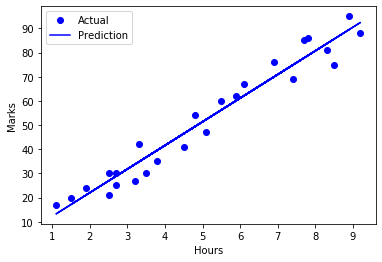

In [69]:
plt.plot(feature , target , 'bo' , label = 'Actual')
plt.plot(feature , reg.predict(feature) , 'b' , label = 'Prediction')

plt.legend()
plt.xlabel('Hours')
plt.ylabel('Marks')

plt.show()

Wow! The line fit quite nicely.
Lets check the r2 score also to gain a better understanding.

In [40]:
reg.score(feature , target)

0.9529481969048356

Lets try a bit more and do a Polynomial Regression of degree 2.

In [64]:
poly = PolynomialFeatures(degree = 2) 
poly_features = poly.fit_transform(feature)
poly_features

array([[ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  5.1 , 26.01],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  8.5 , 72.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  9.2 , 84.64],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  8.3 , 68.89],
       [ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  7.7 , 59.29],
       [ 1.  ,  5.9 , 34.81],
       [ 1.  ,  4.5 , 20.25],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  1.1 ,  1.21],
       [ 1.  ,  8.9 , 79.21],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  1.9 ,  3.61],
       [ 1.  ,  6.1 , 37.21],
       [ 1.  ,  7.4 , 54.76],
       [ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  4.8 , 23.04],
       [ 1.  ,  3.8 , 14.44],
       [ 1.  ,  6.9 , 47.61],
       [ 1.  ,  7.8 , 60.84]])

Lets fit this data into our polynomial model.

In [65]:
poly_lr = LinearRegression()
poly_reg = poly_lr.fit(poly_features , target)
print('Coefficient of regression is :' , poly_reg.coef_ , '\nIntercept is :' , poly_reg.intercept_)

Coefficient of regression is : [[0.         9.4759253  0.02865213]] 
Intercept is : [3.09153556]


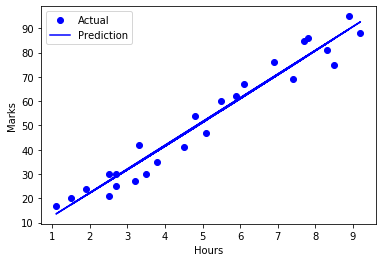

In [66]:
plt.plot(feature , target , 'bo' , label = 'Actual')
plt.plot(feature , poly_reg.predict(poly.fit_transform(feature)) , 'b' , label = 'Prediction')

plt.legend()
plt.xlabel('Hours')
plt.ylabel('Marks')

plt.show()

In [67]:
poly_reg.score(poly_features , target)

0.9529823314098117

Ahh! It performed exactly the same.

That's it! We are at the end of out project! 

Thank You!